In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
laptimes_df = pd.read_csv('F1KaggleData/laptimes.csv')
races_df = pd.read_csv('F1KaggleData/races.csv')
drivers_df = pd.read_csv('F1KaggleData/drivers.csv')



In [3]:
display(drivers_df.sample(10))

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
791,791,biondetti,NaN,NaN,Clemente,Biondetti,1898-08-18,Italian,http://en.wikipedia.org/wiki/Clemente_Biondetti
589,589,chiron,NaN,NaN,Louis,Chiron,1899-08-03,Monegasque,http://en.wikipedia.org/wiki/Louis_Chiron
447,448,broeker,NaN,NaN,Peter,Broeker,15/05/1926,Canadian,http://en.wikipedia.org/wiki/Peter_Broeker
530,530,weiler,NaN,NaN,Wayne,Weiler,09/12/1934,American,http://en.wikipedia.org/wiki/Wayne_Weiler
176,177,keke_rosberg,NaN,NaN,Keke,Rosberg,06/12/1948,Finnish,http://en.wikipedia.org/wiki/Keke_Rosberg
798,798,levrett,NaN,NaN,Bayliss,Levrett,14/02/1914,American,http://en.wikipedia.org/wiki/Bayliss_Levrett
760,760,dusio,NaN,NaN,Piero,Dusio,1899-10-13,Italian,http://en.wikipedia.org/wiki/Piero_Dusio
797,797,holmes,NaN,NaN,Jackie,Holmes,04/09/1920,American,http://en.wikipedia.org/wiki/Jackie_Holmes
276,277,leclere,NaN,NaN,Michel,LeclÌ¬re,18/03/1946,French,http://en.wikipedia.org/wiki/Michel_Lecl%C3%A8re
39,40,friesacher,NaN,FRI,Patrick,Friesacher,26/09/1980,Austrian,http://en.wikipedia.org/wiki/Patrick_Friesacher


In [4]:
races_narrow_df = races_df[['raceId', 'year', 'name']]
drivers_narrow_df = drivers_df[['driverId','driverRef']]

enriched_laptimes_df = pd.merge(laptimes_df, races_narrow_df, on='raceId')
enriched_laptimes_df = pd.merge(enriched_laptimes_df, drivers_narrow_df, on='driverId')

display(enriched_laptimes_df.sample(10))



,raceId,driverId,lap,position,time,milliseconds,year,name,driverRef
66947,957,18,25,12,1:40.217,100217,2016,British Grand Prix,button
308317,179,14,35,2,1:26.060,86060,1999,Spanish Grand Prix,coulthard
321698,117,44,57,8,1:19.260,79260,2003,French Grand Prix,panis
334950,199,50,38,11,1:43.993,103993,1998,British Grand Prix,verstappen
239947,912,821,35,15,1:31.001,91001,2014,Italian Grand Prix,gutierrez
973,857,20,27,1,1:30.245,90245,2011,Indian Grand Prix,vettel
326868,228,49,9,11,1:31.440,91440,1996,San Marino Grand Prix,frentzen
363594,161,23,16,6,1:28.603,88603,2000,British Grand Prix,ralf_schumacher
60286,95,18,31,4,1:15.816,75816,2004,Monaco Grand Prix,button
211504,978,154,15,12,1:36.423,96423,2017,British Grand Prix,grosjean


In [5]:
import ipywidgets as widgets
from IPython.display import clear_output


min_year = enriched_laptimes_df['year'].min()
max_year = enriched_laptimes_df['year'].max()

year_slider = widgets.IntSlider(
                        min=int(enriched_laptimes_df['year'].min()),
                        max=int(enriched_laptimes_df['year'].max()),
                        step=1,
                        description='Year:',
                        value=2016)

display(year_slider)

grand_prix_names = enriched_laptimes_df['name'].unique()

# should really limit the dropdown to the values available for the selected year?



IntSlider(value=2016, description='Year:', max=2017, min=1996)

,position
lap,
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


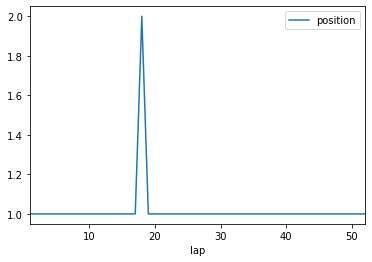

In [12]:
def get_driver_laptimes(laptimes_df, driverRef, year, gp_name):
    
    return laptimes_df.loc[(laptimes_df['driverRef'] == driverRef) & 
                           (laptimes_df['year'] == year) & 
                           (laptimes_df['name'] == gp_name)]
    
    
driver_laptimes_df = get_driver_laptimes(enriched_laptimes_df, 'hamilton', 2016, 'British Grand Prix')

# display(driver_laptimes_df)

def plot_driver_positions_during_race(drivers_lap_times_df):
    position_during_race = driver_laptimes_df[['lap', 'position']]
    position_during_race.set_index('lap', inplace=True)
    display(position_during_race)
    position_during_race.plot()
    
    
plot_driver_positions_during_race(driver_laptimes_df)